In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import model_selection, linear_model, metrics, tree, cluster
import random

In [5]:
M = pd.read_csv("../data/M.csv",index_col=0)
A = pd.read_csv("../data/A.csv",index_col=0)
data = pd.read_csv("../data/filtered_data.csv",index_col=0)
metadata = pd.read_excel('../data/filtered_metadata.xls',skiprows=4,usecols = range (1,32))

In [10]:
M.index = data.index
M.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
A1BG-AS1,-0.001279,-0.000339,-0.001552,-0.000415,-0.000518,-0.001332,-0.000038,0.000188,-0.000509,0.025639,...,0.002450,-0.001487,0.000366,0.001137,-0.000064,-0.001552,0.000309,-0.003694,-0.000760,0.000093
A1CF,0.013970,-0.001171,-0.001810,0.000417,-0.000713,0.001491,-0.001198,0.001216,-0.000551,-0.002266,...,-0.000587,-0.000225,-0.000938,0.001870,-0.000795,-0.000518,-0.002188,-0.001417,-0.000505,0.015542
A2M,-0.000324,0.002643,-0.000026,0.003999,0.000325,0.004074,-0.000111,0.000773,-0.002104,-0.001357,...,-0.003833,-0.002304,-0.001740,0.001613,-0.001191,-0.001891,-0.003774,0.002500,0.002015,-0.002240
A2M-AS1,0.000221,-0.000475,0.000517,-0.003764,0.000053,-0.000834,-0.001165,-0.003175,-0.000882,-0.000458,...,-0.000483,0.000763,-0.000060,-0.000533,-0.000229,-0.000645,-0.001539,-0.002371,0.003289,-0.002145
A2ML1,0.000979,0.000028,0.000224,0.000345,-0.000409,0.003132,-0.000299,-0.002939,0.000499,0.059232,...,-0.001151,0.000263,-0.000288,-0.001800,-0.000599,0.000112,-0.000164,0.000251,0.000022,-0.000901


In [11]:
A.index = data.columns
A.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
C1_NK5_CCCGCTTCCTCC,-0.867838,-0.211830,-0.737092,8.525763,-1.368438,-4.785128,0.693173,0.052749,-2.670260,1.143628,...,3.310055,-2.761662,-1.939526,6.484106,-0.279382,0.560581,-0.542018,-0.398402,-5.747150,0.823351
C1_NK9_CCCCCCCATCCA,0.422032,-0.221937,-0.794647,0.130580,-0.382698,0.397982,0.307181,0.334281,-0.500053,0.460038,...,-0.766892,0.846319,-0.826062,-0.180901,2.567209,1.147141,-0.104313,0.256778,-0.691527,1.271352
C1_NK9_CCCAGCCATCTT,0.154800,0.062945,-0.269081,-0.931915,0.443311,0.686342,0.620122,2.105832,0.071043,-0.003903,...,-1.617050,0.096306,-0.877665,0.099822,0.097179,0.557587,0.821407,4.521349,0.029612,-0.431966
C1_NK9_CGCCCCTTTCTT,-0.523582,0.815243,-0.079583,2.396154,0.098729,-0.113193,0.233267,0.931597,0.571308,1.079308,...,-1.187870,-0.220239,-0.679284,0.074459,-0.021616,0.106258,0.133595,2.066975,-1.426214,0.685978
C1_NK9_CCCCCATTTCCC,-0.509703,0.853835,0.376341,2.088085,0.473262,-1.881503,0.799627,-0.327502,-0.633908,0.834962,...,-1.197923,0.527820,0.204771,-0.224432,0.670076,0.056145,-0.994507,-0.660982,-2.136542,-1.098399


In [39]:
train_labels = []
test_labels = []

train_data = pd.DataFrame(columns = A.columns)
test_data = pd.DataFrame(columns = A.columns)

rand_num = random.sample(range(len(A.index)),int(len(A.index)*.8))
for i in rand_num:
    train_labels.append(A.index[i].split("_")[1])
    train_data = train_data.append(A.iloc[i][:])
for i in A.index:
    if i not in train_labels:
        test_labels.append(i.split("_")[1])
        test_data = test_data.append(A.loc[i])

In [40]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
C6_NK41_ATCTTGAGTTTT,3.130149,-0.723674,0.585024,0.884508,1.541538,0.106454,-0.451773,-0.239021,-0.249914,0.985378,...,-0.864721,0.803098,0.576775,1.423261,0.715852,0.052249,0.006335,0.020127,-1.850675,2.227322
C4_NK81_AAGCCTTTTTGG,-0.466020,0.098769,1.466644,0.107616,0.673838,-0.449899,0.400737,0.136652,0.465495,0.356027,...,0.638763,-0.438639,0.283074,0.417044,-0.112502,-0.469219,-0.025858,0.560420,-0.253394,0.008410
C13_NK35_TCTCGCACATAG,-0.193482,2.417645,1.220912,1.185449,1.330045,0.173438,0.067133,0.179428,1.052809,0.594183,...,-0.198973,0.165033,1.419406,0.243753,0.715588,0.195110,0.067581,3.231951,1.195625,0.872902
C13_NK35_TAAGCCAGAGCA,-0.668291,0.540454,-0.394623,0.680757,1.122915,1.439487,1.143670,0.890110,-0.308638,0.292269,...,0.625152,0.406500,-0.346948,0.857823,0.556957,0.190751,0.914377,3.475540,1.199522,0.038781
C3_NK81_CTCCTTGCTTCC,0.018066,-0.095196,0.139690,1.684009,0.317742,0.226389,0.893098,0.494306,-0.840191,0.284773,...,1.944181,-0.226785,0.104019,0.422711,0.322215,0.010691,0.902579,0.206812,0.800196,-0.034908


In [41]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,280,281,282,283,284,285,286,287,288,289
C1_NK5_CCCGCTTCCTCC,-0.867838,-0.211830,-0.737092,8.525763,-1.368438,-4.785128,0.693173,0.052749,-2.670260,1.143628,...,3.310055,-2.761662,-1.939526,6.484106,-0.279382,0.560581,-0.542018,-0.398402,-5.747150,0.823351
C1_NK9_CCCCCCCATCCA,0.422032,-0.221937,-0.794647,0.130580,-0.382698,0.397982,0.307181,0.334281,-0.500053,0.460038,...,-0.766892,0.846319,-0.826062,-0.180901,2.567209,1.147141,-0.104313,0.256778,-0.691527,1.271352
C1_NK9_CCCAGCCATCTT,0.154800,0.062945,-0.269081,-0.931915,0.443311,0.686342,0.620122,2.105832,0.071043,-0.003903,...,-1.617050,0.096306,-0.877665,0.099822,0.097179,0.557587,0.821407,4.521349,0.029612,-0.431966
C1_NK9_CGCCCCTTTCTT,-0.523582,0.815243,-0.079583,2.396154,0.098729,-0.113193,0.233267,0.931597,0.571308,1.079308,...,-1.187870,-0.220239,-0.679284,0.074459,-0.021616,0.106258,0.133595,2.066975,-1.426214,0.685978
C1_NK9_CCCCCATTTCCC,-0.509703,0.853835,0.376341,2.088085,0.473262,-1.881503,0.799627,-0.327502,-0.633908,0.834962,...,-1.197923,0.527820,0.204771,-0.224432,0.670076,0.056145,-0.994507,-0.660982,-2.136542,-1.098399


In [67]:
clf = tree.DecisionTreeClassifier(random_state = 0).fit(train_data,train_labels)
predicted_class = clf.predict(test_data)

array(['NK5', 'NK9', 'NK9', ..., 'NK44', 'NK55', 'NK81'], dtype='<U4')

MCC: 0.8963046668660763


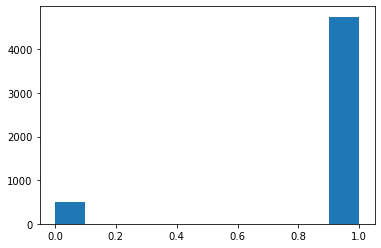

In [76]:
results = []
for i in range(len(predicted_class)):
    if predicted_class[i] == test_labels[i]:
        results.append(1)
    else:
        results.append(0)
result_bar = plt.hist(results)
print("Matthews Correlation Coefficient: "+str(metrics.matthews_corrcoef(test_labels,predicted_class)))

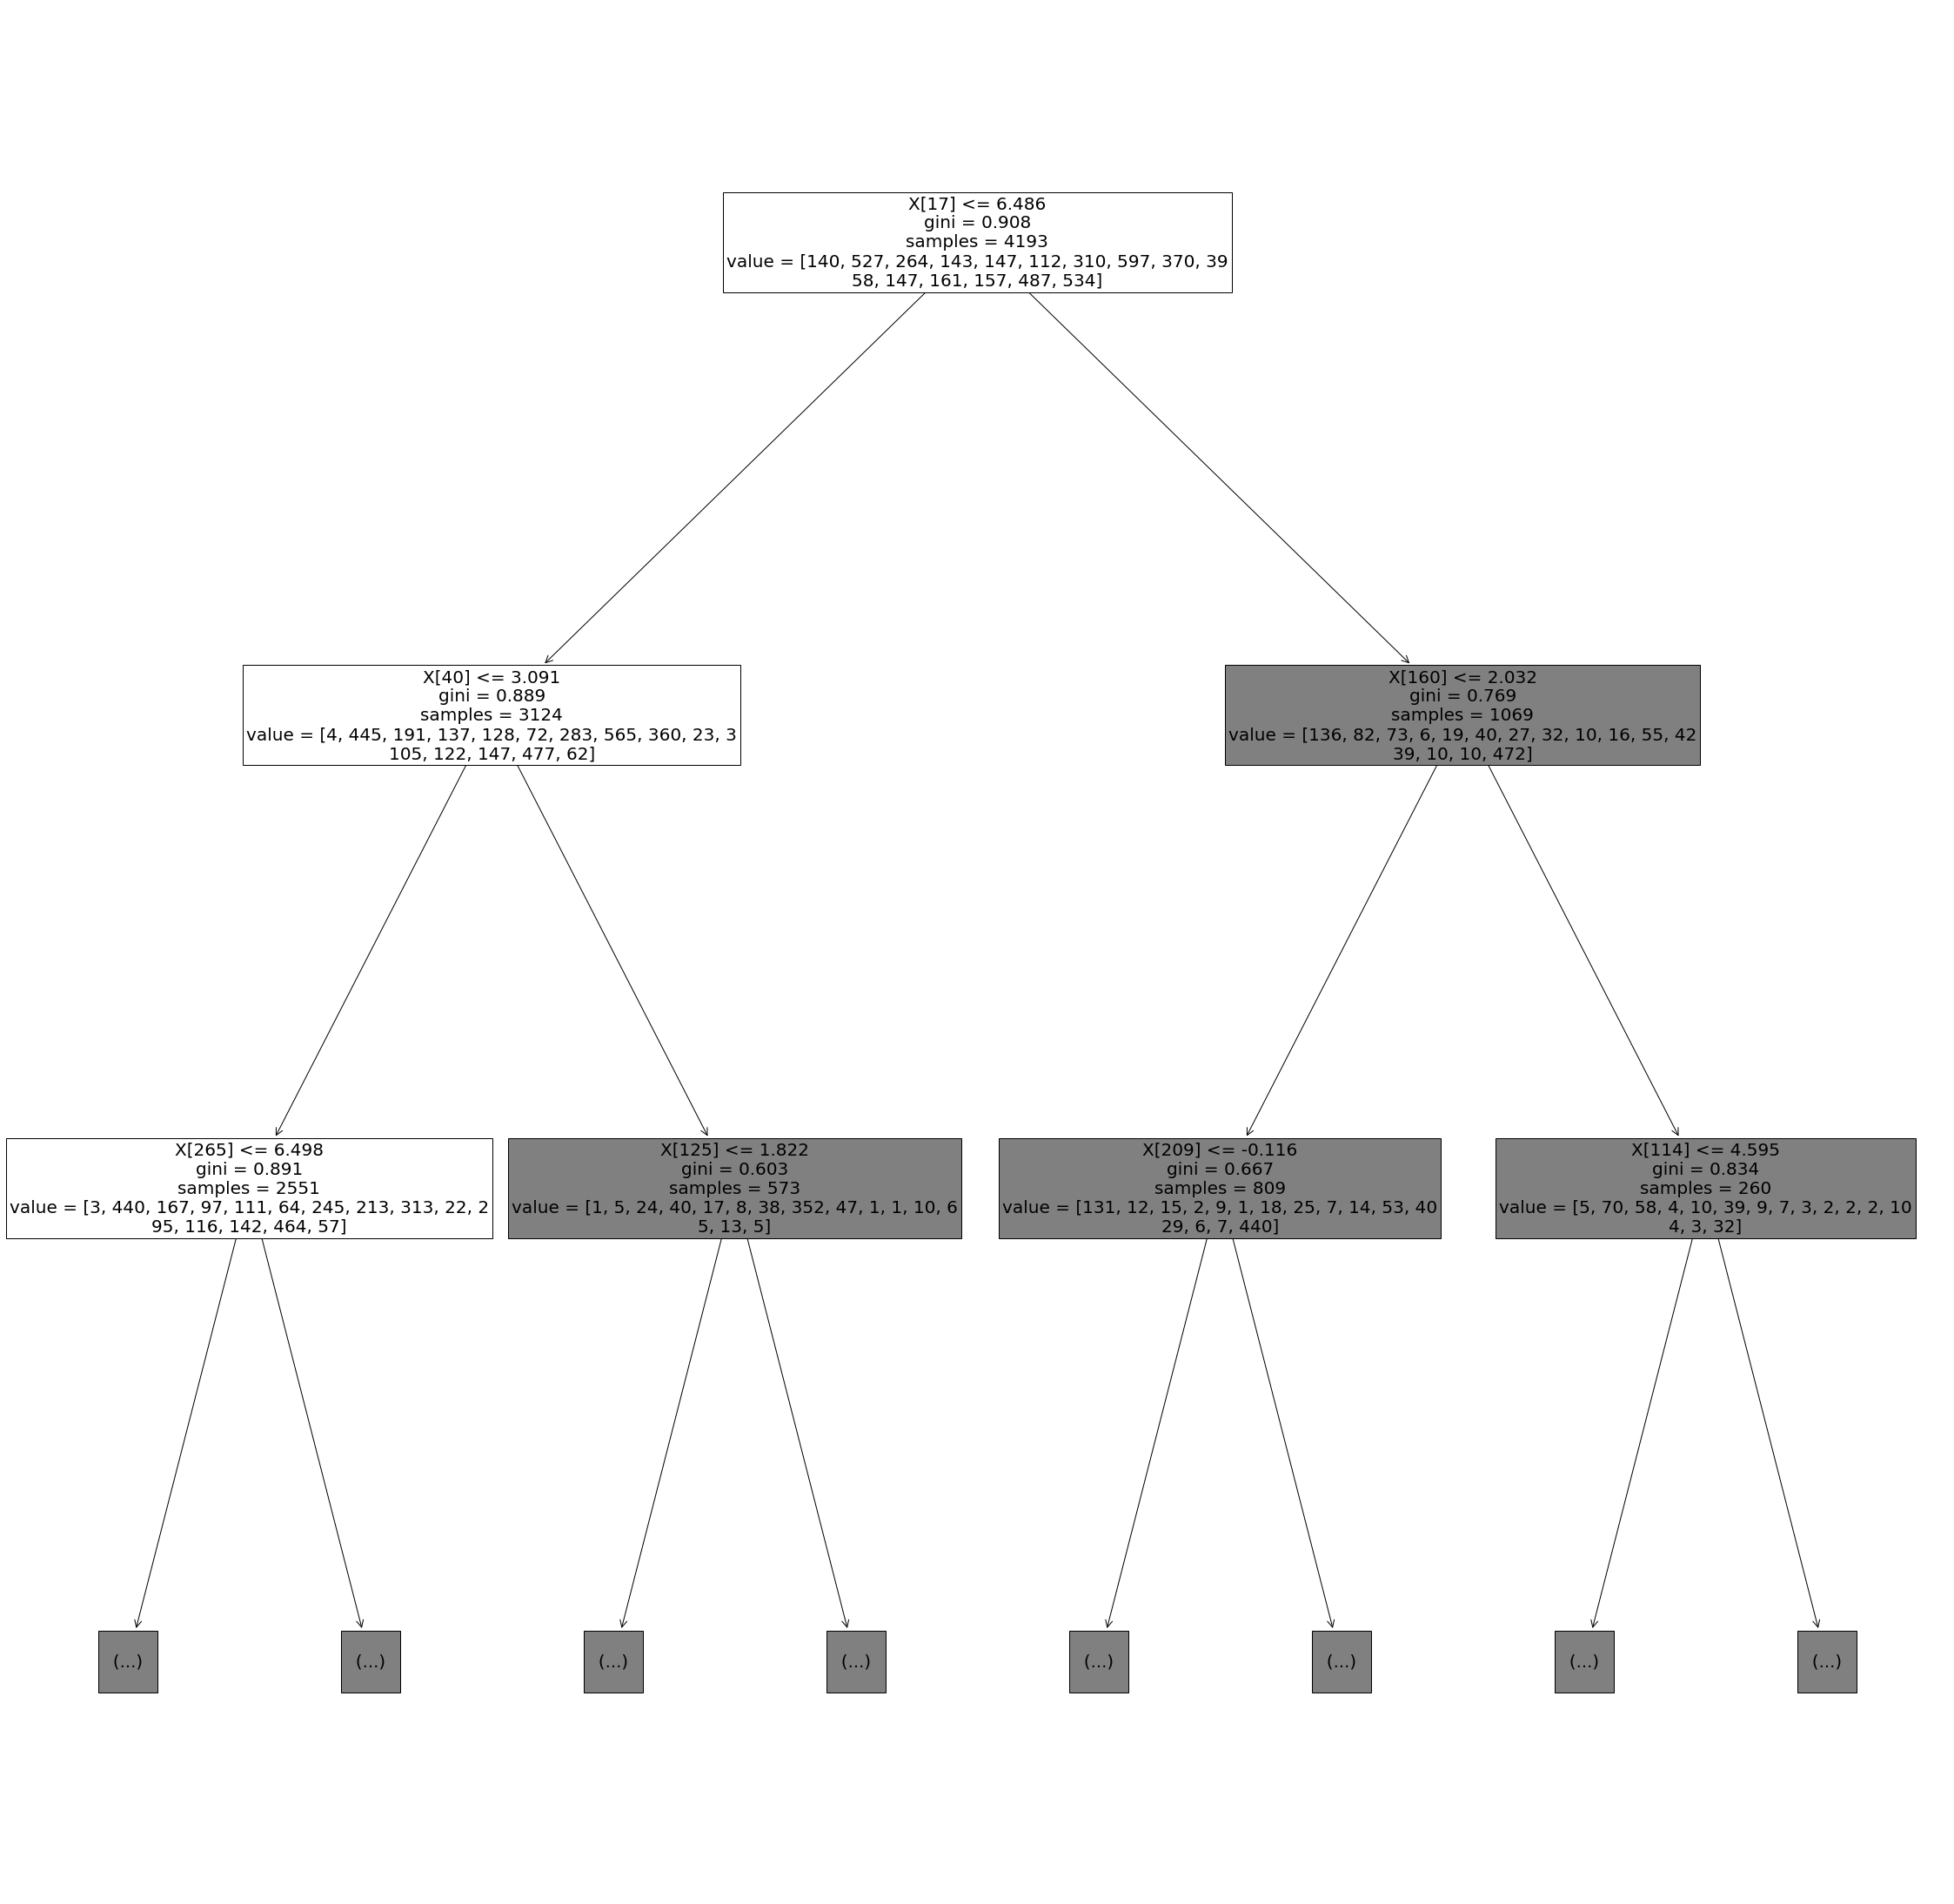

In [73]:
fig,ax = plt.subplots(figsize=[40,40])
full_tree = tree.plot_tree(clf,ax=ax,max_depth = 2,fontsize = 20)

In [74]:
#fig.savefig("../data/classifier_tree.png")

In [196]:
imp_comp = [17,40,160,265,125,209]
imp_comp_data = pd.DataFrame(index = M.index)

for i in imp_comp:
    imp_comp_data= imp_comp_data.join(M[str(i)])
imp_comp_data

,17,40,160,265,125,209
A1BG-AS1,-0.001699,-0.002935,-0.001092,0.002198,0.005738,-0.004265
A1CF,0.007418,-0.006904,-0.001153,0.010597,0.000970,-0.004035
A2M,-0.004410,-0.001045,-0.003265,-0.005572,-0.010346,-0.001515
A2M-AS1,0.001134,-0.004160,-0.001588,-0.002458,0.000696,-0.000654
A2ML1,-0.009162,-0.003730,-0.002867,0.002245,-0.002272,0.014557
...,...,...,...,...,...,...
ZYG11A,0.010359,0.000448,0.003565,0.003635,-0.002843,0.006256
ZYG11B,0.008604,-0.002218,0.003693,-0.000618,0.002747,0.003184
ZYX,-0.002168,0.000395,0.003120,-0.004593,-0.001710,-0.001587
ZZEF1,0.000353,-0.002553,-0.010219,0.005743,0.006304,-0.002402


In [219]:
import tqdm.notebook as tqdm
cutoffs = {}
for i in tqdm.tqdm(imp_comp_data.columns):
    single_run = pd.Series(list(imp_comp_data[i]))
    single_run_score = stats.normaltest(single_run.values)[0]
    initial_score = single_run_score
    sig_genes = []
    while single_run_score > initial_score*.75:
        sig_genes.append(max((single_run)))
        single_run = single_run.drop(single_run.loc[single_run==max((single_run))].index)
        single_run_score = stats.normaltest(single_run.values)[0]
    cutoff = min(sig_genes)
    cutoffs.update({i:cutoff})

In [220]:
cutoffs

{'17': 0.042208198720324566,
 '40': 0.10470108303063004,
 '160': 0.15054381613765894,
 '265': 0.056891735685269375,
 '125': 0.06261464157848477,
 '209': 0.045798122594618684}

In [221]:
def plot_gene_weights(data,component,cutoffs):
    fig,ax = plt.subplots()
    for i in range(len(data[component].index)):
        if data[component].iloc[i] > cutoffs[component]:
            ax.plot(i,data[component].iloc[i],"o",color="tab:blue")
        else:
            ax.plot(i,data[component].iloc[i],"o",color="tab:grey")
    ax.set_xlim(-10,len(data[component].index))
    ax.plot([-10,len(data[component].index)],[cutoffs[component],cutoffs[component]],"--",color="tab:grey")
    ax.plot([-10,len(data[component].index)],[-cutoffs[component],-cutoffs[component]],"--",color="tab:grey")
    
    return ax

def iModulon_genes(data,component,cutoff):
    iMod = []
    for i in range(len(data[component].index)):
        if data[component].iloc[i] > cutoffs[component]:
            iMod.append(data.index[i])
    return iMod

<AxesSubplot:>

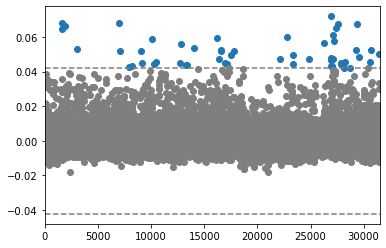

In [222]:
plot_gene_weights(imp_comp_data,"17",cutoffs)

<AxesSubplot:>

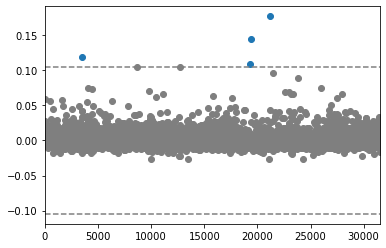

In [223]:
plot_gene_weights(imp_comp_data,"40",cutoffs)

<AxesSubplot:>

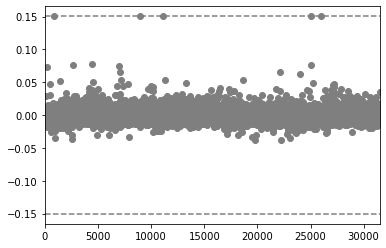

In [224]:
plot_gene_weights(imp_comp_data,"160",cutoffs)

In [225]:
imod = iModulon_genes(imp_comp_data,"17",cutoffs)
imod

['ACSM2A',
 'ACSM2B',
 'AFM',
 'ASS1',
 'CUBN',
 'CYP4A22-AS1',
 'EBNA1BP2',
 'ENPP6',
 'FGGY',
 'FKBP5',
 'GRAMD1B',
 'GUSBP11',
 'HECW1',
 'LINC00893',
 'LINC01060',
 'LRP2',
 'LUC7L3',
 'MIR100HG',
 'PDZD2',
 'PHOSPHO1',
 'PLEKHA6',
 'PLG',
 'PPP1R16B',
 'PRRC2C',
 'RAB11FIP3',
 'RBM25',
 'RP11-469J4.3',
 'RP11-556I14.1',
 'RP11-665G4.1',
 'RP11-66B24.5',
 'RP3-393P12.1',
 'SAFB2',
 'SLC13A3',
 'SLC16A12',
 'SLC16A9',
 'SLC17A1',
 'SLC22A7',
 'SLC29A4P2',
 'SLC2A9',
 'SLC5A12',
 'SMIM2-AS1',
 'SORCS1',
 'SREK1',
 'SRRM2',
 'SUGCT',
 'SYNE2',
 'TIMM23B',
 'TNS1',
 'TRABD2B',
 'TRPM3',
 'XYLB',
 'ZBTB16',
 'ZNF91']